# Classify the breast cancer measurements as benign or malignant


* Do this using the best practices discussed in class (i.e. one hot encoding, ReLU, CNNS when you should, etc.)

* Have reasonable hyperparameters


In [19]:
# Importing the libraries
import numpy as np
import keras
from matplotlib import pyplot as plt
# import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
# !pip install pandas
from keras import optimizers




# Loading the Data and Scaling the Features

In [20]:
# Loading the Training and Testing Data
X = pd.read_csv('./Breast Cancer/breastCancerData.csv')
Y = pd.read_csv('./Breast Cancer/breastCancerLabels.csv')

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

Y= np.array(Y)

/home/anirudh/detect/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/anirudh/detect/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Splitting the Data into Training, Validation and Test Data

In [21]:
# Splitting the Data into Training and Test Data
# X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.15)

# # Splitting the Training Data into training and Validation Data
# X_train, X_val,Y_train,Y_val = train_test_split(X_train, Y_train, test_size=0.2)

# print("For this problem the number of training data is:" + str(X_train.shape[0]) +"\nThe number of" +
# " validation data is:" + str(X_val.shape[0]) + "\nand the number of test data is:" + str(X_test.shape[0]))

In [22]:
X_train = np.load('../../Umbilicus_Skin_Detection/code/X_train.npy').astype('float32')
Y_train = np.load('../../Umbilicus_Skin_Detection/code/Y_train.npy').astype('float32')
X_val = np.load('../../Umbilicus_Skin_Detection/code/X_test.npy').astype('float32')
Y_val = np.load('../../Umbilicus_Skin_Detection/code/Y_test.npy').astype('float32')

# Showing the Training Data after Normalizing

In [23]:
# # Preview the training data
# print (pd.DataFrame(np.hstack((X_train[0:5],Y_train[0:5])),columns= 
#                     ['radius', 'texture','perimeter', 'area' , 'smoothness','compactness', 'concavity',
#                      'concave points', 'symmetry','Is it Malignant?']))

# Setting Hyper Paramters

In [24]:
# Hyper Parameters
batch_size = 16
num_classes = 2
epochs = 200

# Creating Model

In [26]:
# create model
model = Sequential()
model.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu', input_dim = 2000))
model.add(Dropout( 0.2))
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compile model
# model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
sgd = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer=sgd)
# Get Model Summary
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 256)               512256    
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 16)                2064      
_________________________________________________________________
dropout_15 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total para

# Weights and Biases for First Layer 

In [27]:
# Before Training
weights = model.layers[0].get_weights()
w0 = np.array(weights[0])
b0 = np.array(weights[1])
print("The weights for first layer has dimensions of " + str(w0.shape))
print()
print("The Biases for first layer has dimensions of " + str(b0.shape)+" and the values are :\n" + str(b0))
print()
print("Just so we know that the weights have changed after training,\
 we will be comparing the sum of weights of the first layer before and after training.")
print()
print("The sum of weights of the first layer is :" + str(w0.sum()))
print("The sum of biases of the first layer is :" + str(b0.sum()))



The weights for first layer has dimensions of (2000, 256)

The Biases for first layer has dimensions of (256,) and the values are :
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Just so we know that the weights have changed after training, we will be comparing the 

# Training the Model

Training Loss: 0.024453486953464876
Training Accuracy: 0.9941471571906354

Validation Loss: 1.5470696748420596
Validation Accuracy: 0.74375

Test Loss: 1.5470697212219238
Test Accuracy: 0.74375



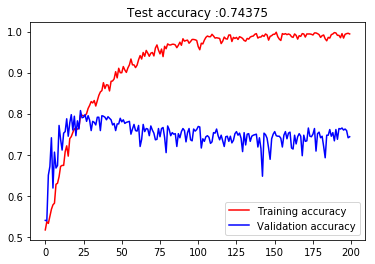

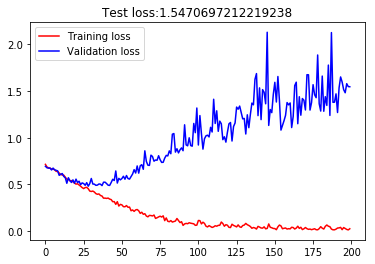

In [28]:
# Train 
h = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
validation_data=(X_val, Y_val))

# Evaluate Accuracy

score = model.evaluate(X_val, Y_val, verbose=0)

print('Training Loss:', h.history['loss'][-1])
print('Training Accuracy:', h.history['acc'][-1])
print()
print('Validation Loss:', h.history['val_loss'][-1])
print('Validation Accuracy:', h.history['val_acc'][-1])
print()
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])
print()

# Plot Graphs
# print(h.history.keys())
accuracy = h.history['acc']
val_accuracy = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Test accuracy :' + str(score[1]))
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Test loss:'+str(score[0]))
plt.legend()
plt.show()


# Inferences
* Here a simple fully connected model was ale to get a convergence in 15 epochs with a batch size of 32.
* As the test accuracy was also above 97 %, we can say that the parameters chosen are correct.
* A simple fully connected model worked here as the input is a less complex matrix as compared to images in MNIST and fashion MNIST. Also Conv2D is not used as it is needed when we want to extract features from images.
* ** Dense Layers: ** Four fully connect layers are used with dropouts in between. The hidden units are again taken in power of 2. 
* ** Drop Out: ** This is very Essential as it helps prevent over fitting. The drop out rate was set to 0.1.
* Using other methods like BatchNormalization and Maxpolling is not required here because of the simplicity of the model or the less number of weights.
* As this is a binary classifier, the final layer consists of sigmoid function as activation and the loss function used is a binary_crossentropy loss.
    


## Testing and Visualizing

# Incorrect Predictions


In [31]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred - Y_test != 0)
incorrect = (errors*1).sum()
print ("Number of Incorrect Predicitons are: " + str(incorrect)+ " out of "+ str (errors.size)+" inputs")
Y_pred_errors = Y_pred1[errors]
Y_true_errors = Y_test[errors]
errordata = np.zeros(shape=(incorrect,11))
pos = np.where(errors == True)
for i in range(0,pos[0].size):
    errordata1 = np.hstack((X_test[pos[0][i]],Y_test[pos[0][i]]))
    errordata1 = np.reshape(np.hstack((errordata1,Y_pred[pos[0][i]])),(1,11))
    errordata[i] = errordata1

print()
print("Displaying the errors")
# Preview the training data
print (pd.DataFrame(errordata,columns= 
                    ['radius', 'texture','perimeter', 'area' , 'smoothness','compactness', 'concavity',
                     'concave points', 'symmetry','Actual Value','Predictd Value']))

NameError: name 'Y_pred' is not defined